In [70]:
print(1)

1


In [71]:
import pandas as pd 
import json
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


In [ ]:
json_path = 'datatran_consolidado.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)

df.rename(columns={'data_inversa': 'data'}, inplace=True)
df.rename(columns={'dia_semana': 'DiaSemana'}, inplace=True)
df.rename(columns={'tipo_acidente': 'TipoAcidente'}, inplace=True)
df.rename(columns={'condicao_metereologica': 'CondicaoMetereologica'}, inplace=True)

df = df[df['TipoAcidente'].astype(str).str.lower() != 'none']

df['TipoAcidente'] = df['TipoAcidente'].str.replace(' ', '')

df["horario"] = pd.to_timedelta(df["horario"]).dt.total_seconds()

df

,data,DiaSemana,horario,uf,municipio,TipoAcidente,CondicaoMetereologica
0,01/01/2020,quarta-feira,20400.0,PA,SAO FRANCISCO DO PARA,Saidadeleitocarrosavel,Ceu Claro
1,01/01/2020,quarta-feira,21600.0,MG,UBERABA,Colisaotransversal,Ceu Claro
2,01/01/2020,quarta-feira,21600.0,BA,CANUDOS,Saidadeleitocarrosavel,Nublado
3,01/01/2020,quarta-feira,36480.0,SP,APARECIDA,Colisaotraseira,Sol
4,01/01/2020,quarta-feira,43800.0,MG,JUATUBA,Saidadeleitocarrosavel,Ceu Claro
...,...,...,...,...,...,...,...
380846,28/07/2025,segunda-feira,31800.0,CE,FORTALEZA,Colisaotraseira,Ceu Claro
380847,26/04/2025,sábado,48600.0,MG,ARAGUARI,Saidadeleitocarrosavel,Nublado
380848,28/08/2025,quinta-feira,69600.0,PR,FOZ DO IGUACU,Saidadeleitocarrosavel,Ceu Claro
380849,11/06/2025,quarta-feira,37800.0,PR,SANTO ANTONIO DO SUDOESTE,Colisaotransversal,Ceu Claro


In [77]:
df['horario']

0         05:40:00
1         06:00:00
2         06:00:00
3         10:08:00
4         12:10:00
            ...   
380846    08:50:00
380847    13:30:00
380848    19:20:00
380849    10:30:00
380850    20:40:00
Name: horario, Length: 380851, dtype: object

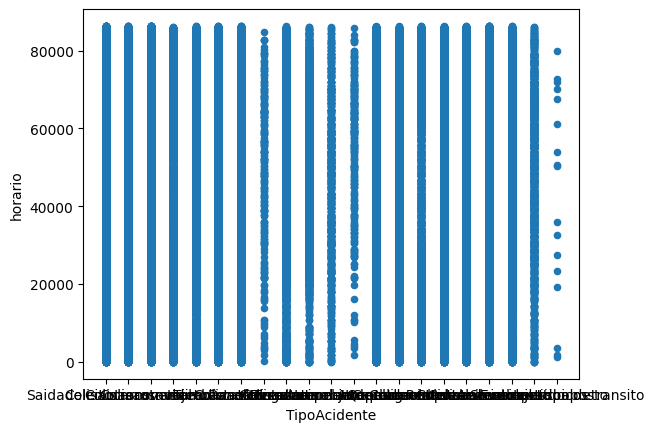

In [73]:
df.plot(kind="scatter", x="TipoAcidente", y="horario");

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


# --- 1. Carregamento dos Dados ---
# Carrega o arquivo JSON em um DataFrame
try:
    df = pd.read_json("datatran_consolidado.json")
except Exception as e:
    print(f"Erro ao carregar o arquivo JSON: {e}")
    # Se o carregamento falhar, para a execução.
    # Certifique-se de que o arquivo está no mesmo diretório ou use o caminho completo.
    exit()

# --- 2. Pré-processamento e Feature Engineering (Correção do ValueError) ---

# Converte a coluna 'horario' para o total de segundos a partir da meia-noite (00:00:00)
# Isso transforma a coluna de string/tempo em uma feature numérica.
df['time_delta'] = pd.to_timedelta(df['horario'])
df['horario_seconds'] = df['time_delta'].dt.total_seconds()

# Define as features (X) e o target (y)
X = df[['horario']]
y = df['tipo_acidente']

# O modelo de Regressão Logística não consegue lidar com strings no target (y).
# É necessário codificar a variável alvo (y) de strings para números inteiros.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- 3. Separação dos Dados ---
# Separa os dados em conjuntos de treinamento e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=None
)


# --- 4. Treinamento do Modelo ---
# Inicializa o modelo de Regressão Logística (Classificação Multiclasse)
modelo = LogisticRegression(max_iter=1000, random_state=42)

# Treina o modelo com os dados numéricos
modelo.fit(X_train, y_train)

# --- 5. Avaliação do Modelo ---
# Faz previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Calcula a acurácia
acuracia = accuracy_score(y_test, y_pred)

# --- 6. Exibição dos Resultados ---
print("--- Resultados do Modelo de Classificação (Regressão Logística) ---")
print(f"Total de Tipos de Acidente (Classes): {len(le.classes_)}")
print(f"Feature utilizada (X): 'horario_seconds'")
print(f"\nAcurácia do Modelo no Conjunto de Teste: {acuracia * 100:.2f}%")

# Exemplo de previsão: Qual o tipo de acidente mais provável às 15:30:00?
# 15 horas * 3600 segundos/hora + 30 minutos * 60 segundos/minuto = 55800 segundos
tempo_exemplo_segundos = pd.DataFrame({'horario_seconds': [55800]})
previsao_num = modelo.predict(tempo_exemplo_segundos)

# Decodifica o resultado numérico para o nome do tipo de acidente
previsao_tipo = le.inverse_transform(previsao_num)

print(f"\nExemplo: Para o horário 15:30:00 (55800 segundos), o modelo prevê: '{previsao_tipo[0]}'")

ValueError: could not convert string to float: '01:25:00'

In [ ]:
import pandas as pd

modelo = linear_model.LogisticRegression()

# Assuming 'df' is your DataFrame and 'horario' is a column of time strings (e.g., 'HH:MM:SS')

# 1. Convert the 'horario' column to pandas Timedelta objects
#    We prepend a dummy date to convert it to a full datetime object first,
#    then extract the time difference from a reference point (e.g., the date itself).
df['time_delta'] = pd.to_timedelta(df['horario'])

# 2. Convert the Timedelta to total seconds
#    This gives a numerical feature representing the time of day.
df['horario_seconds'] = df['time_delta'].dt.total_seconds()

# Now, use the new numerical column for your feature matrix (X)
X_new = df[['horario_seconds']]
y = df[['TipoAcidente']]

# Retrain the model
modelo.fit(X_new, y)

c:\Users\ARTHURPEDROTAVARESDE\Downloads\pred\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


# --- 1. Carregamento dos Dados ---
# Carrega o arquivo JSON em um DataFrame
try:
    df = pd.read_json("datatran_consolidado.json")
except Exception as e:
    print(f"Erro ao carregar o arquivo JSON: {e}")
    # Se o carregamento falhar, para a execução.
    # Certifique-se de que o arquivo está no mesmo diretório ou use o caminho completo.
    exit()

# --- 2. Pré-processamento e Feature Engineering (Correção do ValueError) ---

# Converte a coluna 'horario' para o total de segundos a partir da meia-noite (00:00:00)
# Isso transforma a coluna de string/tempo em uma feature numérica.
df['time_delta'] = pd.to_timedelta(df['horario'])
df['horario_seconds'] = df['time_delta'].dt.total_seconds()

# Define as features (X) e o target (y)
X = df[['horario']]
y = df['tipo_acidente']

# O modelo de Regressão Logística não consegue lidar com strings no target (y).
# É necessário codificar a variável alvo (y) de strings para números inteiros.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- 3. Separação dos Dados ---
# Separa os dados em conjuntos de treinamento e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=None
)


# --- 4. Treinamento do Modelo ---
# Inicializa o modelo de Regressão Logística (Classificação Multiclasse)
modelo = LogisticRegression(max_iter=1000, random_state=42)

# Treina o modelo com os dados numéricos
modelo.fit(X_train, y_train)

# --- 5. Avaliação do Modelo ---
# Faz previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Calcula a acurácia
acuracia = accuracy_score(y_test, y_pred)

# --- 6. Exibição dos Resultados ---
print("--- Resultados do Modelo de Classificação (Regressão Logística) ---")
print(f"Total de Tipos de Acidente (Classes): {len(le.classes_)}")
print(f"Feature utilizada (X): 'horario_seconds'")
print(f"\nAcurácia do Modelo no Conjunto de Teste: {acuracia * 100:.2f}%")

# Exemplo de previsão: Qual o tipo de acidente mais provável às 15:30:00?
# 15 horas * 3600 segundos/hora + 30 minutos * 60 segundos/minuto = 55800 segundos
tempo_exemplo_segundos = pd.DataFrame({'horario_seconds': [55800]})
previsao_num = modelo.predict(tempo_exemplo_segundos)

# Decodifica o resultado numérico para o nome do tipo de acidente
previsao_tipo = le.inverse_transform(previsao_num)

print(f"\nExemplo: Para o horário 15:30:00 (55800 segundos), o modelo prevê: '{previsao_tipo[0]}'")

ValueError: could not convert string to float: '01:25:00'

In [ ]:
# Assuming 'df' is your DataFrame
df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S') # Convert to datetime objects

df['hour'] = df['horario'].dt.hour
df['minute'] = df['horario'].dt.minute
df['second'] = df['horario'].dt.second

# Use these three numerical columns as features
X_alternative = df[['hour', 'minute', 'second']]
modelo.fit(X_alternative, y)

ValueError: time data "20400" doesn't match format "%H:%M:%S", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:



x=df[["horario"]]
y=df[["TipoAcidente"]]

modelo.fit(x, y)

c:\Users\ARTHURPEDROTAVARESDE\Downloads\pred\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARTHURPEDROTAVARESDE\Downloads\pred\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
modelo.predict

<bound method LinearClassifierMixin.predict of LogisticRegression()>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


# --- 1. Carregamento dos Dados ---
# Carrega o arquivo JSON em um DataFrame
try:
    df = pd.read_json("datatran_consolidado.json")
except Exception as e:
    print(f"Erro ao carregar o arquivo JSON: {e}")
    # Se o carregamento falhar, para a execução.
    # Certifique-se de que o arquivo está no mesmo diretório ou use o caminho completo.
    exit()

# --- 2. Pré-processamento e Feature Engineering (Correção do ValueError) ---

# Converte a coluna 'horario' para o total de segundos a partir da meia-noite (00:00:00)
# Isso transforma a coluna de string/tempo em uma feature numérica.
df['time_delta'] = pd.to_timedelta(df['horario'])
df['horario_seconds'] = df['time_delta'].dt.total_seconds()

# Define as features (X) e o target (y)
X = df[['horario']]
y = df['tipo_acidente']

# O modelo de Regressão Logística não consegue lidar com strings no target (y).
# É necessário codificar a variável alvo (y) de strings para números inteiros.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- 3. Separação dos Dados ---
# Separa os dados em conjuntos de treinamento e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=None
)


# --- 4. Treinamento do Modelo ---
# Inicializa o modelo de Regressão Logística (Classificação Multiclasse)
modelo = LogisticRegression(max_iter=1000, random_state=42)

# Treina o modelo com os dados numéricos
modelo.fit(X_train, y_train)

# --- 5. Avaliação do Modelo ---
# Faz previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Calcula a acurácia
acuracia = accuracy_score(y_test, y_pred)

# --- 6. Exibição dos Resultados ---
print("--- Resultados do Modelo de Classificação (Regressão Logística) ---")
print(f"Total de Tipos de Acidente (Classes): {len(le.classes_)}")
print(f"Feature utilizada (X): 'horario_seconds'")
print(f"\nAcurácia do Modelo no Conjunto de Teste: {acuracia * 100:.2f}%")

# Exemplo de previsão: Qual o tipo de acidente mais provável às 15:30:00?
# 15 horas * 3600 segundos/hora + 30 minutos * 60 segundos/minuto = 55800 segundos
tempo_exemplo_segundos = pd.DataFrame({'horario_seconds': [55800]})
previsao_num = modelo.predict(tempo_exemplo_segundos)

# Decodifica o resultado numérico para o nome do tipo de acidente
previsao_tipo = le.inverse_transform(previsao_num)

print(f"\nExemplo: Para o horário 15:30:00 (55800 segundos), o modelo prevê: '{previsao_tipo[0]}'")

ValueError: could not convert string to float: '01:25:00'

In [ ]:
print(f"Acurácia do Modelo: {acuracia * 100:.2f}%")